In [1]:
from data_helper import timeserie2image, read_files
import numpy as np
import pandas as pd
from dataset import UCIHARDataset
from transform import Transform
import torch
from barlowtwins import BarlowTwins
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from lightning.pytorch.trainer import Trainer
import datetime


np.random.seed(42)

In [2]:
train_data, train_y, validation_data, validation_y, test_data, test_y = read_files()

In [3]:
train_y

,0
0,5
1,5
2,5
3,5
4,5
...,...
6238,2
6239,2
6240,2
6241,2


In [4]:
validation_y

,0
688,5
689,5
690,5
691,5
692,5
...,...
7347,2
7348,2
7349,2
7350,2


In [5]:
train_x = []
for i in range(train_data.shape[0]):
    signal = train_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    train_x.append(image)
train_x = torch.tensor(np.array(train_x))

validation_x = []
for i in range(validation_data.shape[0]):
    signal = validation_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    validation_x.append(image)
validation_x = torch.tensor(np.array(validation_x))

test_x = []
for i in range(test_data.shape[0]):
    signal = test_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    test_x.append(image)
test_x = torch.tensor(np.array(test_x))

In [6]:
train_dataset = UCIHARDataset(train_x, train_y, transform=Transform())
val_dataset = UCIHARDataset(validation_x, validation_y, transform=Transform())
test_dataset = UCIHARDataset(test_x, test_y, transform=Transform())

In [7]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

In [8]:
bt_model = BarlowTwins()
current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [9]:
early_stopping = EarlyStopping('val_loss', patience=100, verbose=True, mode='min')
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',  # Monitor validation loss
    mode='min',          # 'min' mode means the checkpoint will be saved when the monitored quantity decreases
    save_top_k=1,        # Save the best model
    dirpath=current_date,  # Directory to save the checkpoints
    filename='model',  # Filename format
)
trainer = Trainer(limit_train_batches=1.0, max_epochs=100000, callbacks=[early_stopping, checkpoint_callback], accelerator="gpu", devices="auto")
trainer.fit(model=bt_model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type                      | Params
---------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training

Training: |          | 0/? [00:00<?, ?it/s]

C:\Users\dpalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:

base_dir = 'data/UCIHAR/dataset/UCI HAR Dataset'
# Training data
# Train users
train_users = pd.read_csv(f'{base_dir}/train/subject_train.txt', header=None)
# Train accelerometer data
train_acc_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
train_acc_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
train_acc_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=None)
# Train gyroscope data
train_gyro_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None)
train_gyro_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_y_train.txt', delim_whitespace=True, header=None)
train_gyro_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/body_gyro_z_train.txt', delim_whitespace=True, header=None)
# Train total acc data
train_total_acc_x = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
train_total_acc_y = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
train_total_acc_z = pd.read_csv(f'{base_dir}/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Train labels
train_y = pd.read_csv(f'{base_dir}/train/y_train.txt', header=None)

# Test data
# Test users
test_users = pd.read_csv(f'{base_dir}/test/subject_test.txt', header=None)
# Test accelerometer data
test_acc_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_x_test.txt', delim_whitespace=True, header=None)
test_acc_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_y_test.txt', delim_whitespace=True, header=None)
test_acc_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_acc_z_test.txt', delim_whitespace=True, header=None)
# Test gyroscope data
test_gyro_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_x_test.txt', delim_whitespace=True, header=None)
test_gyro_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_y_test.txt', delim_whitespace=True, header=None)
test_gyro_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/body_gyro_z_test.txt', delim_whitespace=True, header=None)
# Test total acc data
test_total_acc_x = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
test_total_acc_y = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
test_total_acc_z = pd.read_csv(f'{base_dir}/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)
# Test labels
test_y = pd.read_csv(f'{base_dir}/test/y_test.txt', header=None)

In [ ]:
train_data = pd.concat([train_users, train_gyro_x, train_gyro_y, train_gyro_z, train_total_acc_x, train_total_acc_y, train_total_acc_z, train_acc_x, train_acc_y, train_acc_z], axis=1)
test_data = pd.concat([test_users, test_gyro_x, test_gyro_y, test_gyro_z, test_total_acc_x, test_total_acc_y, test_total_acc_z, test_acc_x, test_acc_y, test_acc_z], axis=1)

In [ ]:
train_users.shape, test_users.shape, train_data.shape, test_data.shape

((7352, 1), (2947, 1), (7352, 1153), (2947, 1153))

In [ ]:
first_elem = train_data.iloc[0,1:]
first_elem = first_elem.values.reshape(9, -1)
first_elem[:,:68].shape

(9, 68)

In [ ]:
users_for_train = np.random.choice(train_users.iloc[:,0].unique(), 7, replace=False)
users_for_validation = np.setdiff1d(train_users.iloc[:,0].unique(), users_for_train)
print(users_for_train, users_for_validation)

[ 1 27 25  3 15  8 19] [ 5  6  7 11 14 16 17 21 22 23 26 28 29 30]


In [ ]:
train_y = train_y[train_data.iloc[:,0].isin(users_for_train)]
validation_y = train_y[train_data.iloc[:,0].isin(users_for_validation)]

validation_data = train_data[train_data.iloc[:,0].isin(users_for_validation)].iloc[:,1:]
train_data = train_data[train_data.iloc[:,0].isin(users_for_train)].iloc[:,1:]
test_data = test_data.iloc[:,1:]

C:\Users\dpalo\AppData\Local\Temp\ipykernel_26204\3781707170.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  validation_y = train_y[train_data.iloc[:,0].isin(users_for_validation)]


In [ ]:
train_x = []
for i in range(train_data.shape[0]):
    signal = train_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    train_x.append(image)
train_x = torch.tensor(np.array(train_x))

validation_x = []
for i in range(validation_data.shape[0]):
    signal = validation_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    validation_x.append(image)
validation_x = torch.tensor(np.array(validation_x))

test_x = []
for i in range(test_data.shape[0]):
    signal = test_data.iloc[i,:].values.reshape(9, -1)
    image = timeserie2image(signal)
    image = np.array([image, image, image])
    test_x.append(image)
test_x = torch.tensor(np.array(test_x))

In [ ]:
train_x.shape, validation_x.shape, test_x.shape

(torch.Size([2442, 3, 36, 128]),
 torch.Size([4910, 3, 36, 128]),
 torch.Size([2947, 3, 36, 128]))

In [ ]:
train_dataset = UCIHARDataset(train_x, train_y, transform=Transform())
val_dataset = UCIHARDataset(validation_x, validation_y, transform=Transform())
test_dataset = UCIHARDataset(test_x, test_y, transform=Transform())
nextval = next(iter(train_dataset))

SAMPLE SHAPE torch.Size([3, 36, 128])


In [ ]:
train_y.iloc[0,0]

5

In [ ]:
nextval[0].shape, nextval[1].shape, nextval[2]

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]), 5)

In [ ]:
assert False

AssertionError: 

In [ ]:
iterd = iter(train_dataset)
for i in range(100):
    nextval = next(iterd)
    print(nextval[0].shape, nextval[1].shape, nextval[2])

SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) 5
SAMPLE SHAPE torch.Size([3, 36, 128])
torch.Size([3, 224, 224]) torch.Size([3, 2

In [ ]:
from torchvision.transforms import Compose, ToPILImage, ToTensor, Normalize
# Transform tensor to 224x224
transform = Compose([
    ToPILImage(),
    ToTensor(),
    Normalize(mean=[0.5], std=[0.5])
])

# Resize to 224x224
train_dataset.transform = transform



In [ ]:
import numpy as np
import os

y_val = {
1: 'WALKING',
2: 'WALKING_UPSTAIRS',
3: 'WALKING_DOWNSTAIRS',
4: 'SITTING',
5: 'STANDING',
6: 'LAYING'
}
timestamps = 128
os.makedirs('images', exist_ok=True)
random_elements = np.random.randint(0, train_data.shape[0], 10)
for elem in random_elements:
    print(elem)
    data = train_data.iloc[elem,1:]
    data = data.values.reshape(9, -1)
    print(y_val[train_y.iloc[elem,0]])
    timeserie2image(data[:,:timestamps], f'images/{timestamps}-{y_val[train_y.iloc[elem,0]]}-{elem}.png')

2433


ValueError: cannot reshape array of size 1151 into shape (9,newaxis)

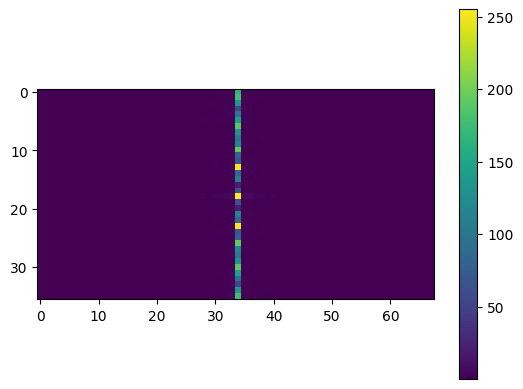

(36, 68)


In [ ]:
timeserie2image(first_elem[:,:68], 'test.png')

In [ ]:
assert False

AssertionError: 

[ 1 27 25  3 15  8 19] [ 5  6  7 11 14 16 17 21 22 23 26 28 29 30]


In [ ]:
train_data.columns

Index(['1',   0,   1,   2,   3,   4,   5,   6,   7,   8,
       ...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127],
      dtype='object', length=769)

In [ ]:
validation_data = train_data[train_data.iloc[:,0].isin(users_for_validation)]
train_data = train_data[train_data.iloc[:,0].isin(users_for_train)]
# Remove users from the data
train_data = train_data.iloc[:,1:]
validation_data = validation_data.iloc[:,1:]

In [ ]:
# Filtering the labels
train_y = train_y[train_y.iloc[:,0].isin(users_for_train)]
validation_y = train_y[train_y.iloc[:,0].isin(users_for_validation)]

In [ ]:
validation_y

,5


In [ ]:
users.shape, train_acc_x.shape, train_acc_y.shape, y_train.shape, train_total.shape

((7351, 1), (7351, 128), (7351, 128), (7351, 1), (7351, 128))